In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#빈칸 채우기
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

In [7]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


AttributeError: 'list' object has no attribute 'str'

In [15]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] #첫째자리수만


In [18]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

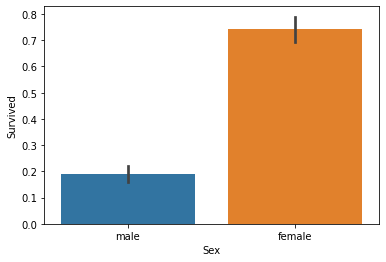

In [19]:
sns.barplot(x = 'Sex', y = 'Survived',data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

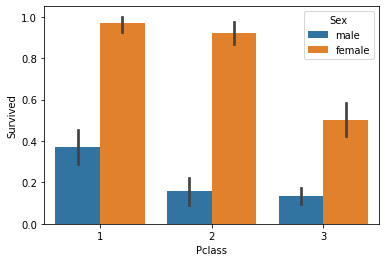

In [20]:
sns.barplot(x = 'Pclass', y ='Survived', hue = 'Sex', data = titanic_df
           )

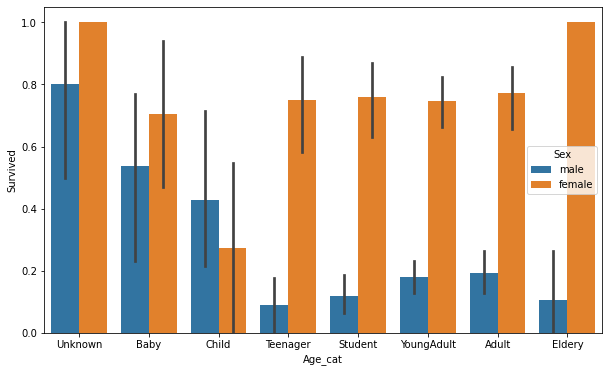

In [24]:
def get_category(age):
    cat = ''
    if age <= 1: cat = 'Unknown'
    elif age <=5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'YoungAdult'
    elif age <=60: cat = 'Adult'
    else : cat = 'Eldery'    
    
    return cat

plt.figure(figsize = [10,6])
group_names = ['Unknown','Baby','Child','Teenager','Student','YoungAdult','Adult','Eldery']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y= 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

In [27]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for features in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[features])
        dataDF[features] = le.transform(dataDF[features])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [30]:
#총정리 함수
from sklearn.preprocessing import LabelEncoder

#NULL 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis =1, inplace = True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [31]:
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #metrics가 지표인듯

In [37]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(max_iter=500) #수렴을 안함

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.7877094972067039
0.8547486033519553
0.8491620111731844


In [40]:
#kfold

from sklearn.model_selection import KFold

def exec_kfold(clf,folds = 5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차검증{0} 정확도{1:0.4f}'.format(iter_count, accuracy))
    mean_score = np.mean(scores)
    print("평균 정확도{0:0.4f}".format(mean_score))

exec_kfold(dt_clf, folds =5)

교차검증0 정확도0.7542
교차검증1 정확도0.7809
교차검증2 정확도0.7865
교차검증3 정확도0.7697
교차검증4 정확도0.8202
평균 정확도0.7823


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv =5)
for iter_count, accuracy in enumerate(scores):
    print('교차검증{0} 정확도{1:0.4f}'.format(iter_count, accuracy))

print("평균 정확도{0:0.4f}".format(np.mean(scores)))

교차검증0 정확도0.7430
교차검증1 정확도0.7753
교차검증2 정확도0.7921
교차검증3 정확도0.7865
교차검증4 정확도0.8427
평균 정확도0.7879


In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.7991825076332119


In [2]:
score_df = pd.DataFrame(grid_dclf.cv_results_)
score_df[['params','mean_test_score','rank_test_score']].sort_values('rank_test_score')
score_df.loc[score_df['rank_test_score']< 3][['params']]

NameError: name 'pd' is not defined

In [52]:
dprediction = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dprediction)
print(accuracy)

0.8715083798882681


In [66]:
licom = [[0]*2]*3
print(type(np.array(licom)))

<class 'numpy.ndarray'>


In [70]:
a = set([1,2,2,4,5,6])
b = set([1,5,6,7,8,9])
print(a|b)
print(a&b)
print(a-b)

{1, 2, 4, 5, 6, 7, 8, 9}
{1, 5, 6}
{2, 4}
